In [14]:
import pandas as pd
import nltk

In [15]:
traindata = pd.read_csv("data/train.csv")
testdata = pd.read_csv("data/test.csv")
traindata.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [16]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

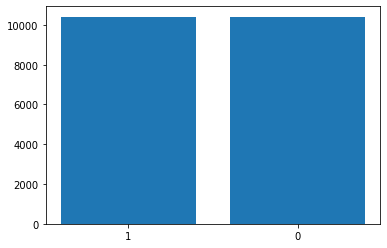

In [17]:
plt.bar(['1','0'],traindata["label"].value_counts())

In [18]:
zero = traindata["label"].value_counts()
zero

1    10413
0    10387
Name: label, dtype: int64

In [19]:
traindata.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [20]:
print(f'(NUmbers of rows in our dataset are:{traindata.shape[0]})')
print(f'(NUmbers of columns in our dataset are:{traindata.shape[1]})')

(NUmbers of rows in our dataset are:20800)
(NUmbers of columns in our dataset are:5)


In [21]:
def handle_nan(data):
    data = data.fillna(" ")
    return data

traindata = handle_nan(traindata)
testdata = handle_nan(testdata)

In [22]:
#separating dependent and independent features
y = traindata["label"]
x = traindata["title"]

In [25]:
x.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: title, dtype: object

In [26]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [27]:
len(x)

20800

In [33]:
def processwords(text):
    corpus = []
    for i in range(0,len(text)):
        textp = re.sub('[^a-zA-Z]',' ',text[i])
        textp = textp.lower()
        textp = textp.split()
        textp = [ps.stem(word) for word in textp if word not in stopwords.words('english')]
        textp = ' '.join(textp)
        corpus.append(textp)
    return corpus
        
train = processwords(x)

In [34]:
train

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [39]:
from tensorflow.keras.preprocessing.text import one_hot
vac_size=5000
onehot_repr = [one_hot(word, vac_size) for word in train]
onehot_repr

[[2392, 1539, 2379, 1502, 4329, 2270, 3392, 3555, 4980, 3844],
 [1941, 4699, 3083, 4361, 1917, 4551, 4449],
 [4836, 739, 1378, 1899],
 [2326, 1552, 4034, 1570, 2103, 4264],
 [3056, 1917, 1099, 581, 500, 80, 1917, 4224, 1290, 1325],
 [1654,
  737,
  1742,
  1658,
  2053,
  2282,
  4418,
  936,
  3687,
  3819,
  4258,
  155,
  465,
  414,
  4449],
 [2456, 2456, 85, 3221, 3798, 2880, 3012, 2206, 459, 4102, 2563, 312],
 [435, 3331, 1660, 4977, 421, 2877, 2698, 4607, 1425, 1724, 299],
 [3107, 2208, 914, 3785, 2282, 1663, 1925, 2788, 3493, 1455, 1425, 1724, 299],
 [2660, 1619, 4046, 1628, 4655, 564, 2282, 1324, 1425, 1724, 299],
 [1008, 2475, 642, 3573, 1441, 586, 3914, 3474, 2282, 4274],
 [2873, 4791, 4628, 1292, 3454, 4181, 4939, 2601],
 [4683, 1599, 2632, 1987, 2886, 711, 4963, 4619, 3996, 2303, 1745],
 [1570, 4023, 4329, 586, 2282, 4655],
 [877, 2306, 2344, 1042, 513, 1899, 2989, 1278, 2418],
 [2498, 703, 209, 3655, 4762, 453, 4106, 1425, 1724, 299],
 [1434, 502, 1322, 1601, 151, 1425, 1

In [42]:
#embedding representation
from tensorflow.keras.preprocessing.sequence import pad_sequences

sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3555 4980 3844]
 [   0    0    0 ... 1917 4551 4449]
 [   0    0    0 ...  739 1378 1899]
 ...
 [   0    0    0 ... 1425 1724  299]
 [   0    0    0 ... 1294 1388 1457]
 [   0    0    0 ... 1399 3622 1358]]


In [43]:
import tensorflow
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

In [45]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(vac_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

X_final.shape,y_final.shape

((20800, 20), (20800,))

In [47]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)



In [49]:


### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)



Epoch 1/10
218/218 [==============================] - 4s 19ms/step - loss: 0.0533 - accuracy: 0.9820 - val_loss: 0.2337 - val_accuracy: 0.9181
Epoch 2/10
218/218 [==============================] - 4s 18ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.3048 - val_accuracy: 0.9212
Epoch 3/10
218/218 [==============================] - 4s 19ms/step - loss: 0.0177 - accuracy: 0.9951 - val_loss: 0.3333 - val_accuracy: 0.9241
Epoch 4/10
218/218 [==============================] - 4s 20ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.4452 - val_accuracy: 0.9154
Epoch 5/10
218/218 [==============================] - 4s 21ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.4697 - val_accuracy: 0.9175
Epoch 6/10
218/218 [==============================] - 4s 21ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.4397 - val_accuracy: 0.9225
Epoch 7/10
218/218 [==============================] - 4s 20ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.5136 - val_accuracy: 0.9200